<a href="https://www.kaggle.com/code/shamkumar1307/vehicle-environmental-impact-model?scriptVersionId=259061035" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/co2-emissions-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions-dataset/FuelConsumption.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('/kaggle/input/co2-emissions-dataset/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df['MODELYEAR'] = pd.to_datetime(df['MODELYEAR'],format='%Y').dt.year

In [7]:
df.dtypes

MODELYEAR                     int32
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [8]:
num_df = df.select_dtypes(include =['float64','int64'])
num_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


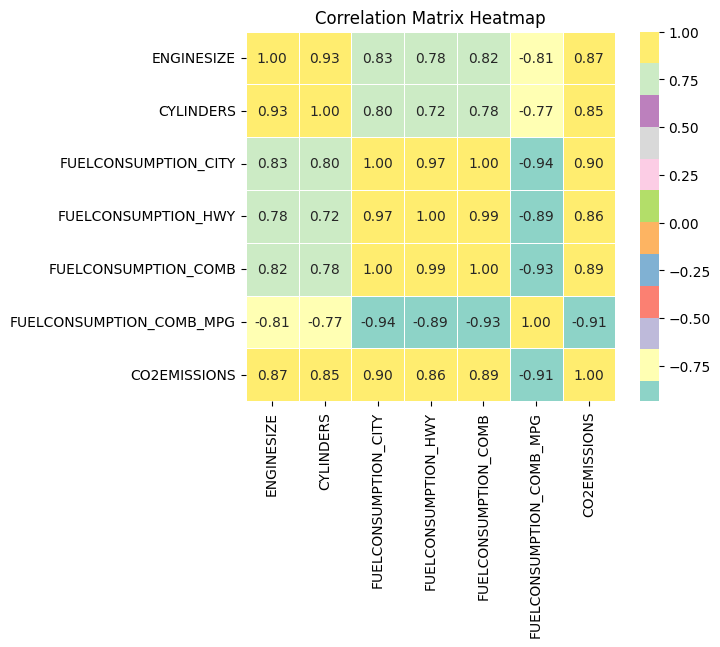

In [9]:
correlation_matrix = num_df.corr()

# Create heatmap
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='Set3',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
df_indt = df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
df_indt.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,9.9,8.5,4,196
1,2.4,11.2,9.6,4,221
2,1.5,6.0,5.9,4,136
3,3.5,12.7,11.1,6,255
4,3.5,12.1,10.6,6,244


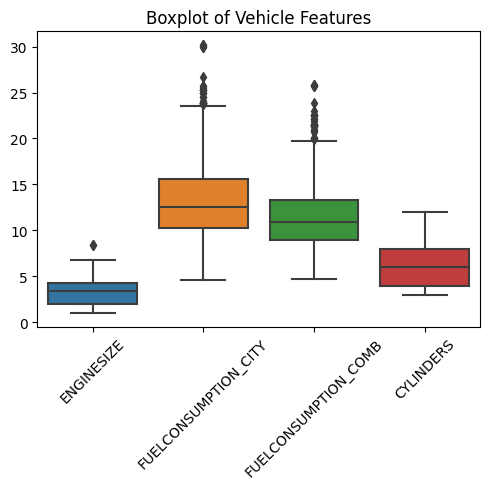

In [11]:
# Create boxplot for multiple columns
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS']])
plt.title('Boxplot of Vehicle Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

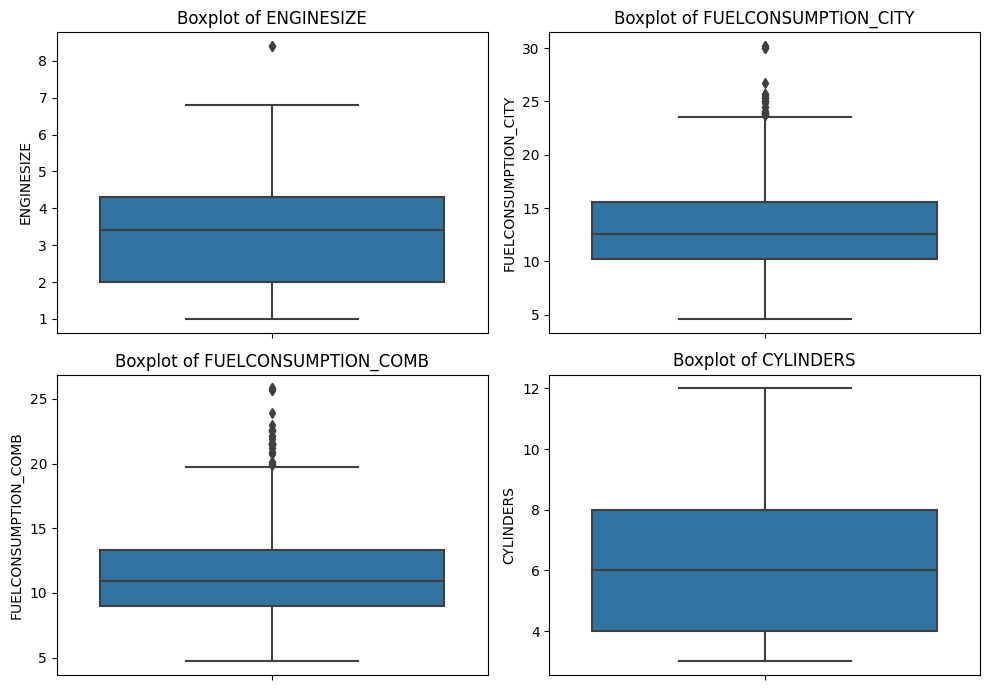

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
features = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

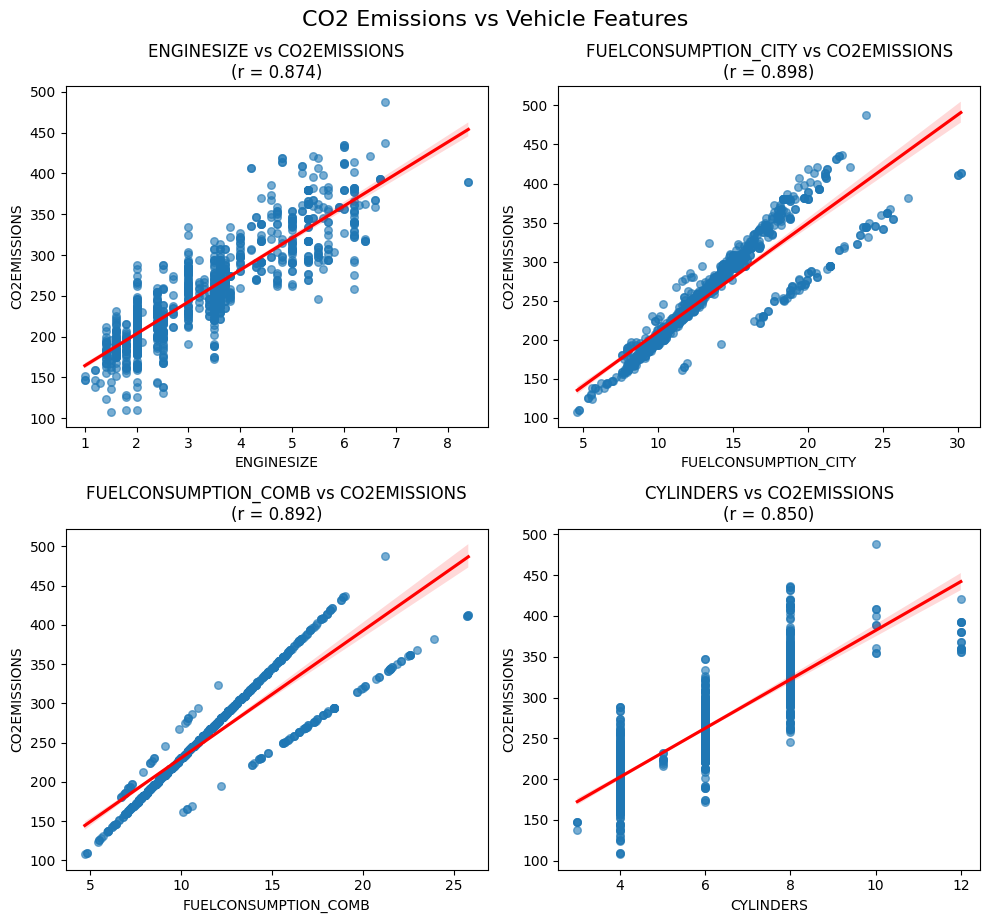

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
features = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    
    # Scatter plot with regression line
    sns.regplot(data=df, x=feature, y='CO2EMISSIONS', ax=ax, 
                scatter_kws={'alpha':0.6, 's':30},
                line_kws={'color': 'red'})
    
    # Calculate correlation
    correlation = df[feature].corr(df['CO2EMISSIONS'])
    ax.set_title(f'{feature} vs CO2EMISSIONS\n(r = {correlation:.3f})')
    ax.set_xlabel(feature)
    ax.set_ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.suptitle('CO2 Emissions vs Vehicle Features', fontsize=16, y=1.02)
plt.show()

In [14]:
# Calculate outlier statistics for each column
features = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

ENGINESIZE: 2 outliers (0.19%)
FUELCONSUMPTION_CITY: 26 outliers (2.44%)
FUELCONSUMPTION_COMB: 32 outliers (3.00%)
CYLINDERS: 0 outliers (0.00%)
CO2EMISSIONS: 6 outliers (0.56%)


In [15]:
def remove_outliers_iqr_multiple(df, columns):
    """
    Remove outliers from multiple columns using IQR method
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Remove outliers from selected features
features_to_clean1 = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']
df_clean = remove_outliers_iqr_multiple(df, features_to_clean1)

print(f"Original shape: {df.shape}")
print(f"Clean shape: {df_clean.shape}")

Original shape: (1067, 13)
Clean shape: (996, 13)


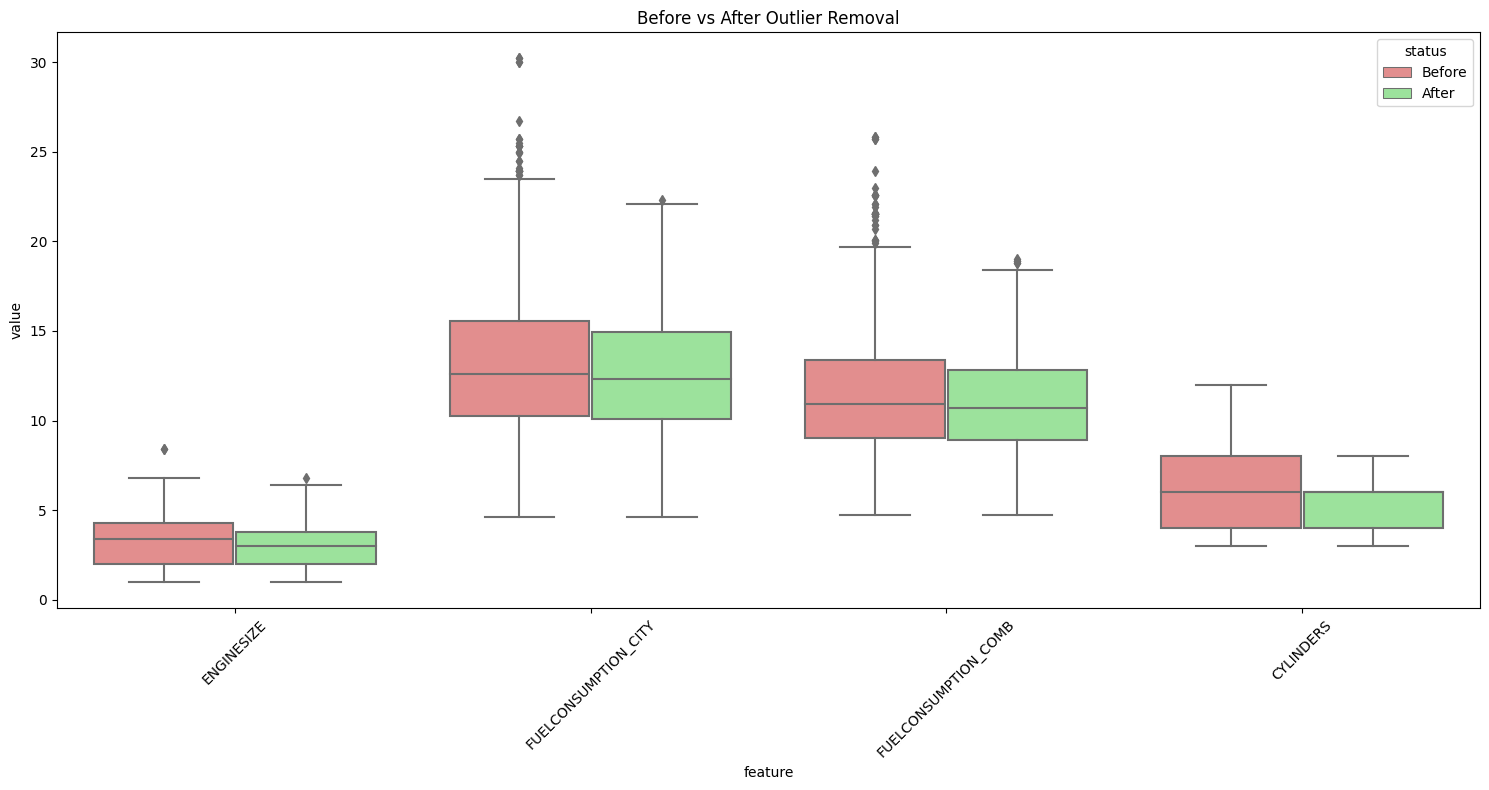

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a combined dataframe for before/after comparison
features_to_clean = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS']

# Create melted dataframes for comparison
def box_compering(features_to_clean):
# Create melted dataframes for comparison
    df_before = df[features_to_clean].copy()
    df_before['status'] = 'Before'
    
    df_after = remove_outliers_iqr_multiple(df, features_to_clean)[features_to_clean].copy()
    df_after['status'] = 'After'
    
    # Combine data
    df_combined = pd.concat([df_before, df_after])
    df_melted = pd.melt(df_combined, id_vars=['status'], 
                        value_vars=features_to_clean,
                        var_name='feature', value_name='value')
    
    # Create side-by-side boxplots
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df_melted, x='feature', y='value', hue='status',
                palette={'Before': 'lightcoral', 'After': 'lightgreen'})
    plt.title('Before vs After Outlier Removal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

box_compering(features_to_clean)

In [17]:
df_clean_feature = df_clean[features_to_clean1]
df_clean_feature.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,9.9,8.5,4,196
1,2.4,11.2,9.6,4,221
2,1.5,6.0,5.9,4,136
3,3.5,12.7,11.1,6,255
4,3.5,12.1,10.6,6,244


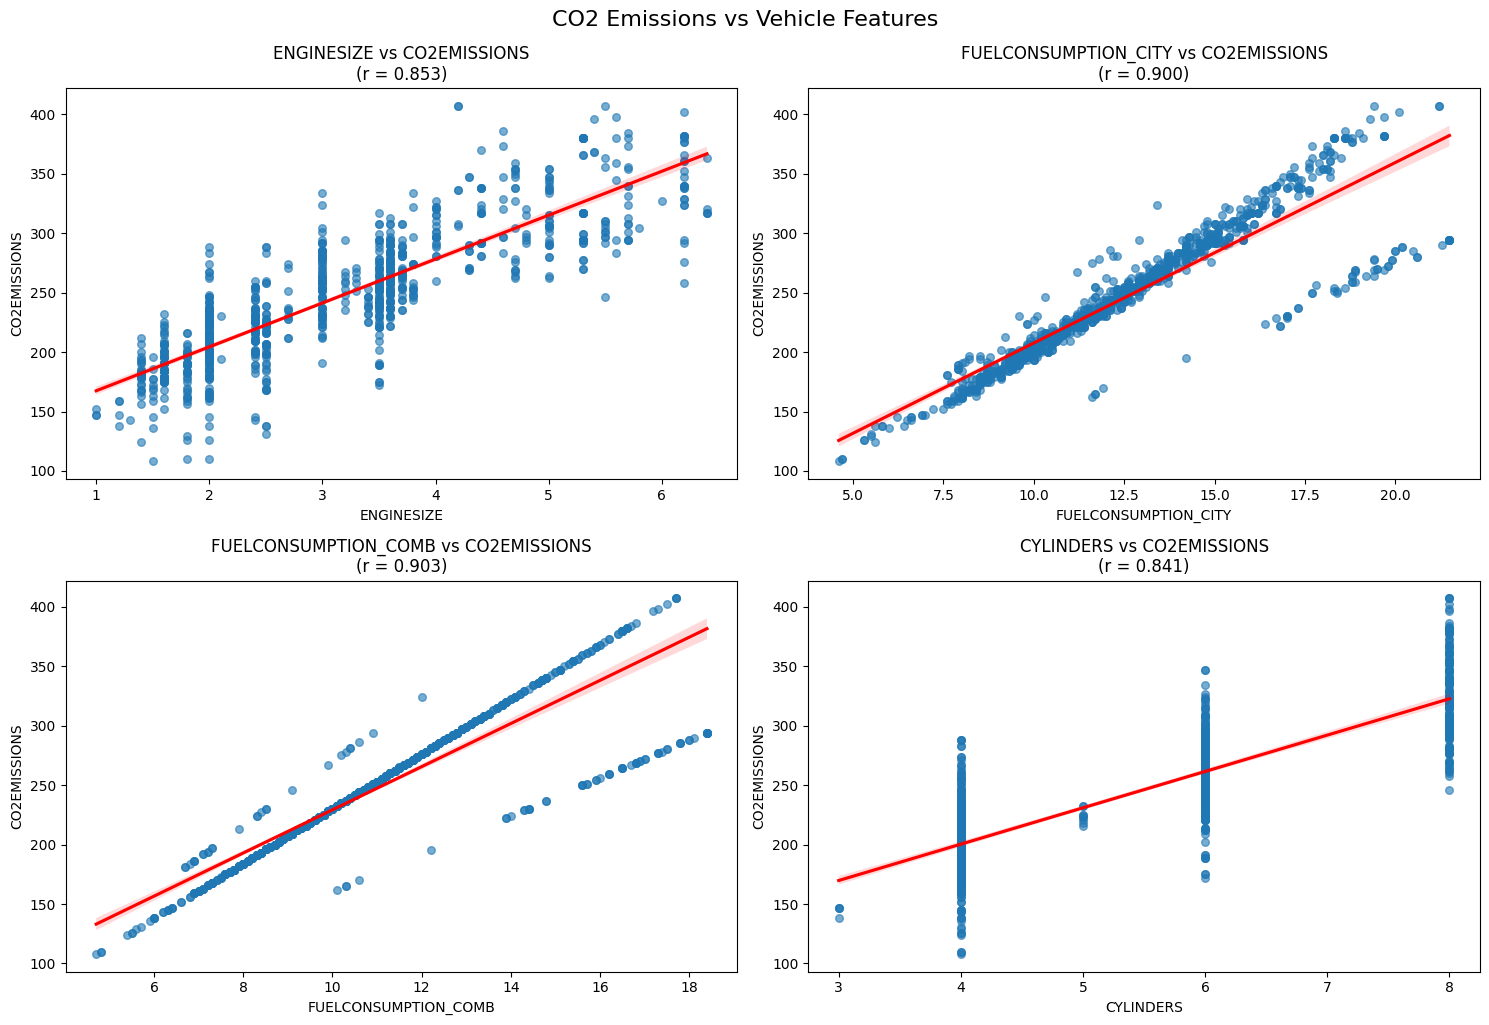

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CYLINDERS']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    
    # Scatter plot with regression line
    sns.regplot(data=df_clean_feature, x=feature, y='CO2EMISSIONS', ax=ax, 
                scatter_kws={'alpha':0.6, 's':30},
                line_kws={'color': 'red'})
    
    # Calculate correlation
    correlation = df_clean_feature[feature].corr(df_clean_feature['CO2EMISSIONS'])
    ax.set_title(f'{feature} vs CO2EMISSIONS\n(r = {correlation:.3f})')
    ax.set_xlabel(feature)
    ax.set_ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.suptitle('CO2 Emissions vs Vehicle Features', fontsize=16, y=1.02)
plt.show()

# Train test split

In [19]:
X = df_clean_feature[['ENGINESIZE']]
y = df_clean_feature['CO2EMISSIONS']

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('cofficients:',model.coef_)
print('intercept:',model.intercept_)

cofficients: [36.70065529]
intercept: 131.1338573049875


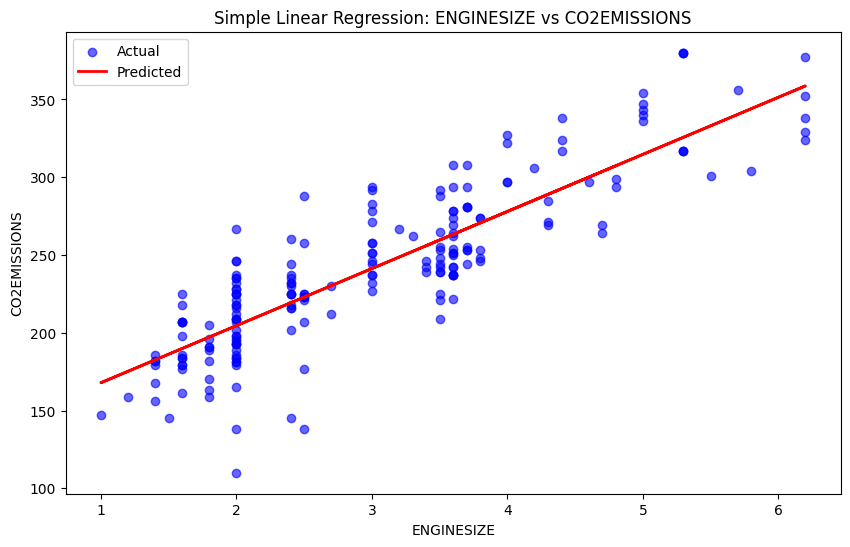

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(test_x, test_y, color='blue', alpha=0.6, label='Actual')
plt.plot(test_x, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Simple Linear Regression: ENGINESIZE vs CO2EMISSIONS')
plt.legend()
plt.show()

In [23]:
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(test_y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(test_y, y_pred)))

Coefficient: 36.700655294459814
Intercept: 131.1338573049875
R² Score: 0.7507812863648194
RMSE: 26.149061233083316


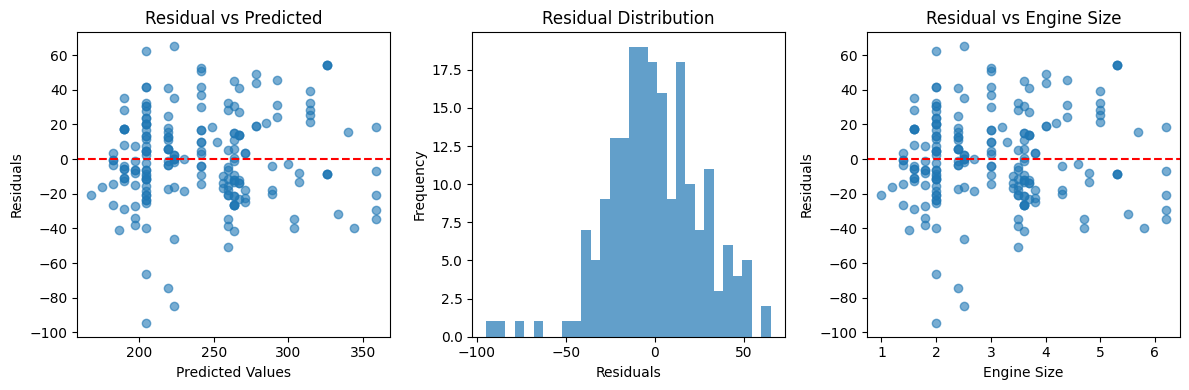

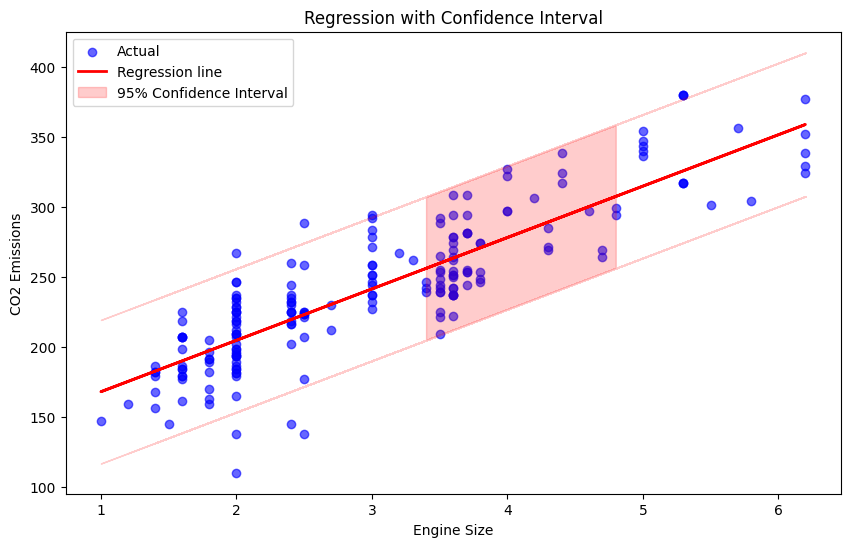


=== PREDICTION EXAMPLES ===
Engine 2.0L → Predicted CO2: 204.5 g/km
   Interpretation: 2.0L engine emits ≈205g CO2/km
Engine 4.0L → Predicted CO2: 277.9 g/km
   Interpretation: 4.0L engine emits ≈278g CO2/km
Engine 6.0L → Predicted CO2: 351.3 g/km
   Interpretation: 6.0L engine emits ≈351g CO2/km
Engine 8.0L → Predicted CO2: 424.7 g/km
   Interpretation: 8.0L engine emits ≈425g CO2/km

=== REGRESSION EQUATION ===
CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE
CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate additional metrics
y_pred = model.predict(test_x)
residuals = test_y - y_pred

# 1. Residual Analysis
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Predicted')

plt.subplot(132)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.subplot(133)
plt.scatter(test_x, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Engine Size')
plt.ylabel('Residuals')
plt.title('Residual vs Engine Size')

plt.tight_layout()
plt.show()

# Confidence Interval for Predictions
def plot_with_confidence(test_x, test_y, y_pred, residuals):
    """Plot regression line with confidence interval"""
    std_residual = np.std(residuals)
    confidence = 1.96 * std_residual  # 95% confidence
    
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x, test_y, alpha=0.6, label='Actual', color='blue')
    plt.plot(test_x, y_pred, color='red', linewidth=2, label='Regression line')
    
    # Confidence interval
    plt.fill_between(test_x.values.flatten(), 
                    y_pred - confidence, 
                    y_pred + confidence, 
                    color='red', alpha=0.2, label='95% Confidence Interval')
    
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.title('Regression with Confidence Interval')
    plt.legend()
    plt.show()

plot_with_confidence(test_x, test_y, y_pred, residuals)

# Prediction Examples with Interpretation
print("\n=== PREDICTION EXAMPLES ===")
example_sizes = [2.0, 4.0, 6.0, 8.0]
for size in example_sizes:
    prediction = model.predict([[size]])[0]
    print(f"Engine {size}L → Predicted CO2: {prediction:.1f} g/km")
    print(f"   Interpretation: {size}L engine emits ≈{prediction:.0f}g CO2/km")

# 4. Model Equation
print(f"\n=== REGRESSION EQUATION ===")
print(f"CO2_EMISSIONS = {model.intercept_:.2f} + {model.coef_[0]:.2f} * ENGINESIZE")
print(f"CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE")

In [25]:
print("\n=== ENVIRONMENTAL IMPACT ANALYSIS ===")
print("Based on your regression model CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE:")

# Annual emissions calculation
annual_km = 15000  # average annual driving distance

for size in [2.0, 4.0, 6.0, 8.0]:
    annual_emissions = (131.13 + 36.70 * size) * annual_km / 1000  # kg CO2/year
    print(f"\n{size}L Engine Vehicle:")
    print(f"  - Annual CO2 emissions: {annual_emissions:.0f} kg CO2/year")
    print(f"  - Equivalent to burning {annual_emissions/2.3:.0f} liters of gasoline")
    
print(f"\nSwitching from 8.0L to 2.0L engine would save:")
savings = ((424.7 - 204.5) * annual_km / 1000)
print(f"  - {savings:.0f} kg CO2 per year")
print(f"  - Equivalent to planting {savings/21:.0f} trees per year")


=== ENVIRONMENTAL IMPACT ANALYSIS ===
Based on your regression model CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE:

2.0L Engine Vehicle:
  - Annual CO2 emissions: 3068 kg CO2/year
  - Equivalent to burning 1334 liters of gasoline

4.0L Engine Vehicle:
  - Annual CO2 emissions: 4169 kg CO2/year
  - Equivalent to burning 1813 liters of gasoline

6.0L Engine Vehicle:
  - Annual CO2 emissions: 5270 kg CO2/year
  - Equivalent to burning 2291 liters of gasoline

8.0L Engine Vehicle:
  - Annual CO2 emissions: 6371 kg CO2/year
  - Equivalent to burning 2770 liters of gasoline

Switching from 8.0L to 2.0L engine would save:
  - 3303 kg CO2 per year
  - Equivalent to planting 157 trees per year


# Multiple Linear Regression

In [26]:
# Let's select some features that we want to use for regression.

featrue_01 = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']
mult_feature = df[featrue_01]

mult_feature.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [27]:
mult_cleaned = remove_outliers_iqr_multiple(mult_feature, featrue_01)

mult_cleaned.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [28]:
print('Before cleaned:',mult_feature.shape[0])
print('After cleaned:',mult_cleaned.shape[0])

Before cleaned: 1067
After cleaned: 1013


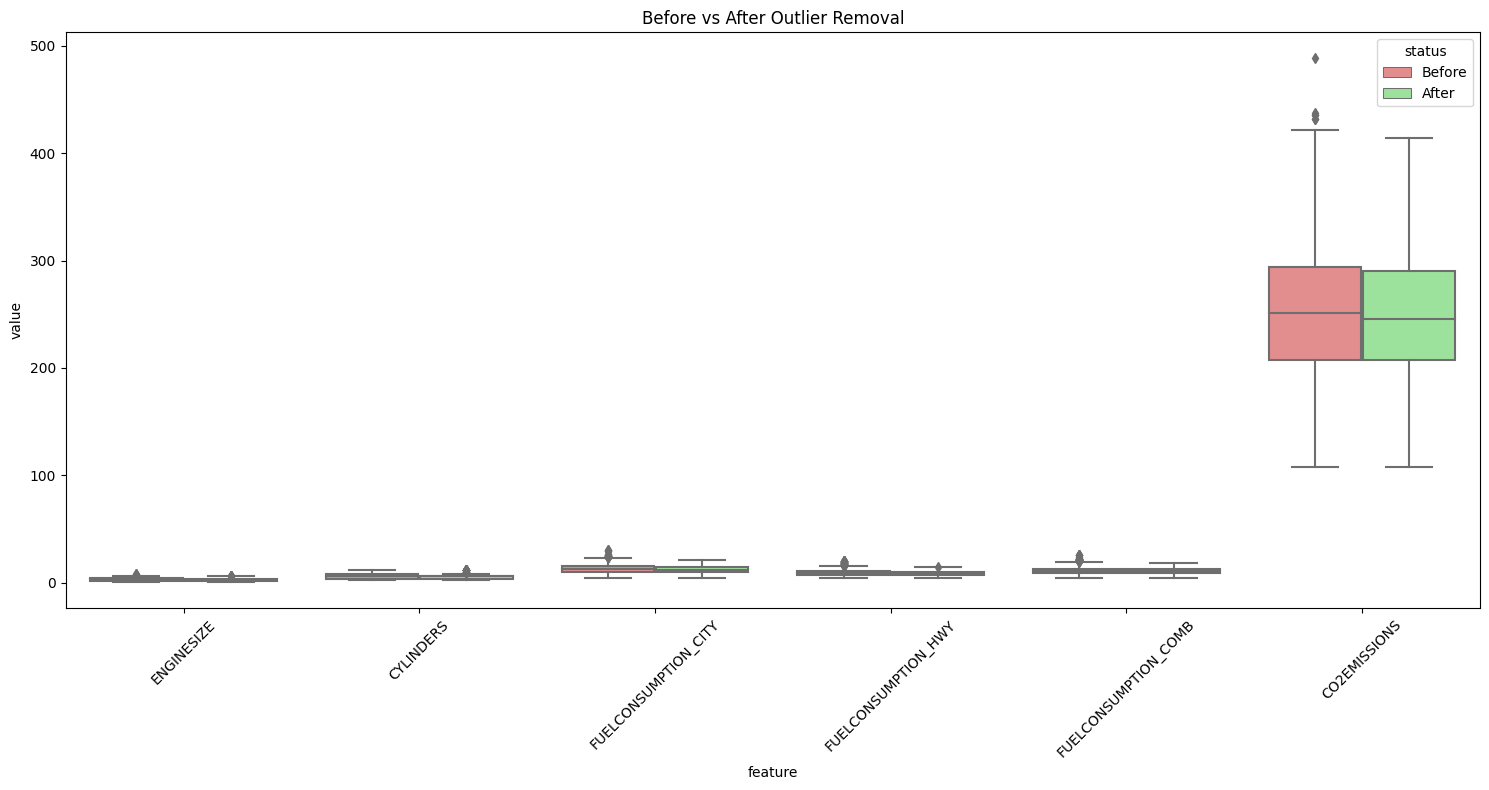

In [29]:
box_compering(featrue_01)

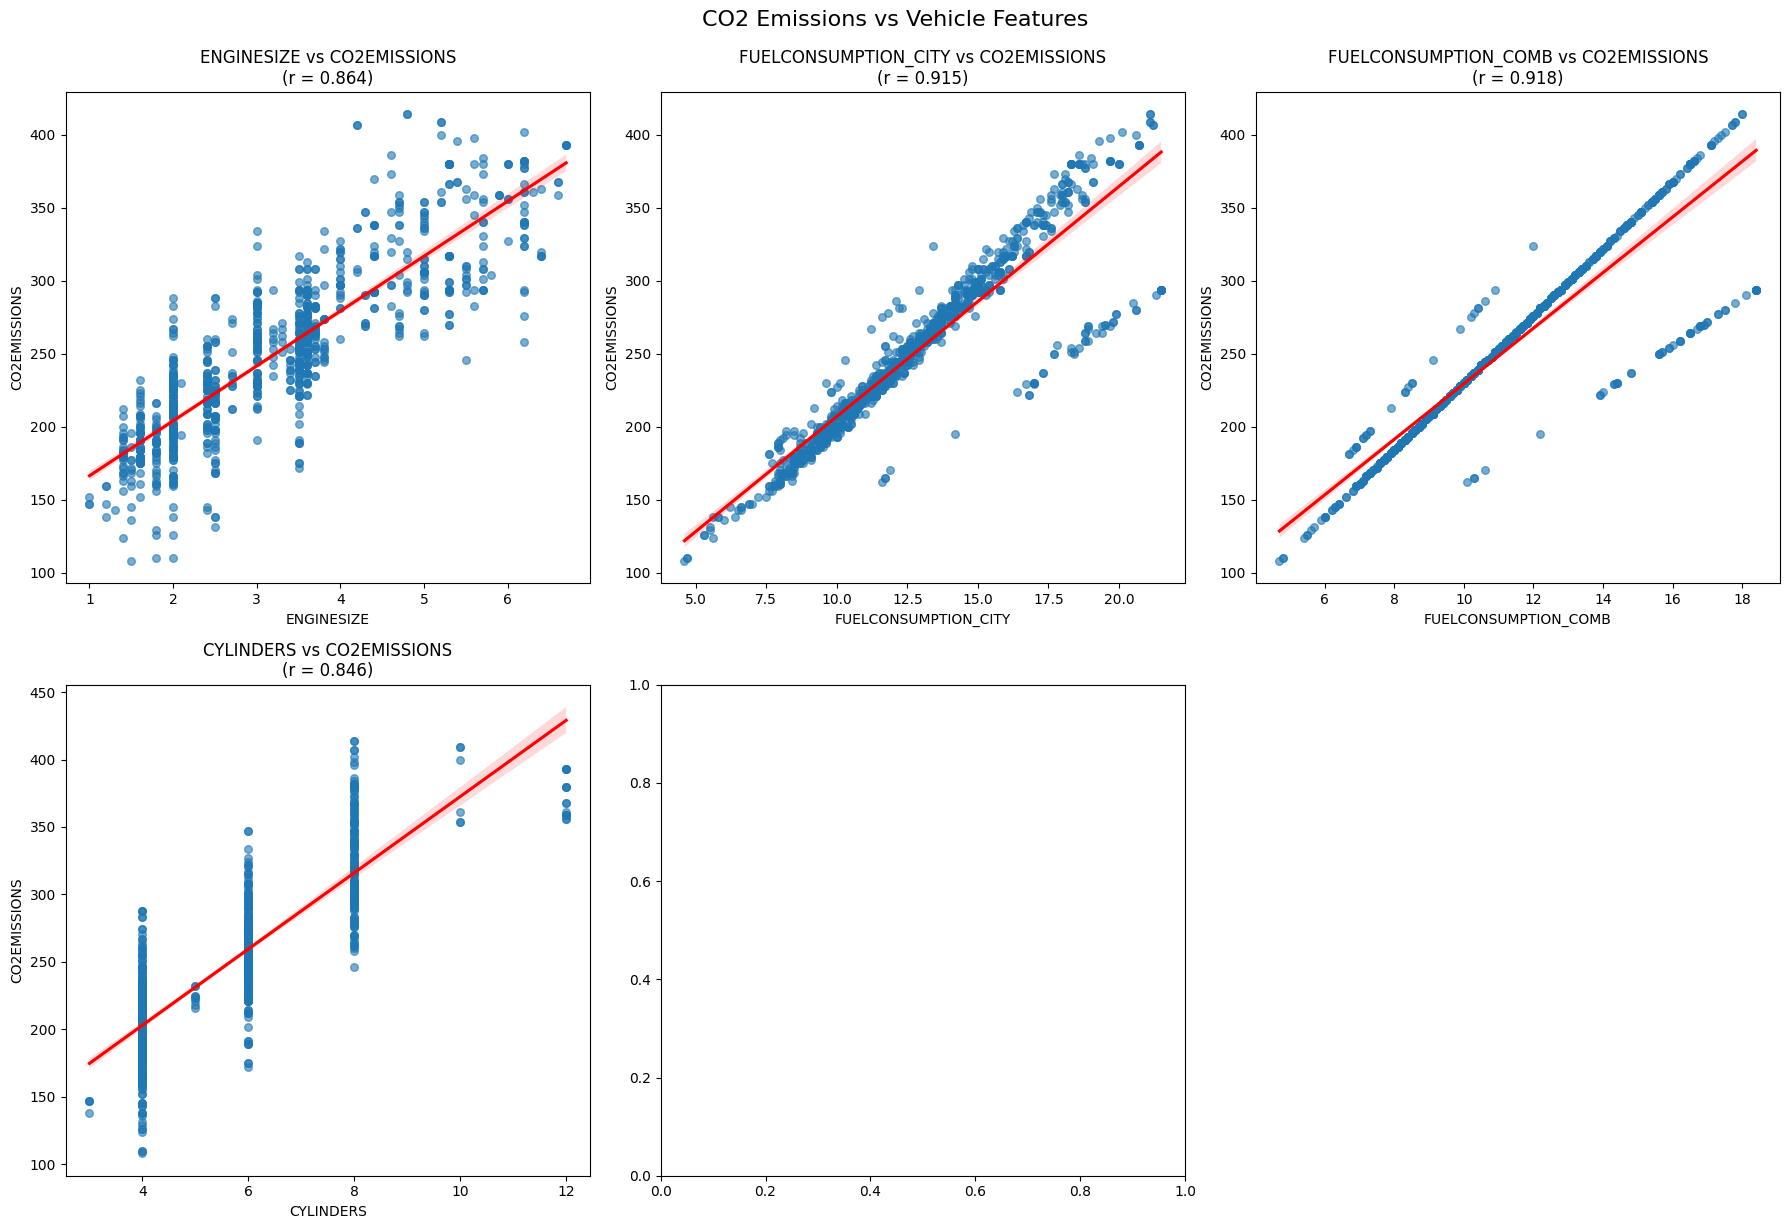

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features01 = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Scatter plot with regression line
    sns.regplot(data=mult_cleaned, x=feature, y='CO2EMISSIONS', ax=ax, 
                scatter_kws={'alpha':0.6, 's':30},
                line_kws={'color': 'red'})
    
    # Calculate correlation
    correlation = mult_cleaned[feature].corr(mult_cleaned['CO2EMISSIONS'])
    ax.set_title(f'{feature} vs CO2EMISSIONS\n(r = {correlation:.3f})')
    ax.set_xlabel(feature)
    ax.set_ylabel('CO2EMISSIONS')

# Remove the 6th subplot (bottom right) since we only have 5 features to plot
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.suptitle('CO2 Emissions vs Vehicle Features', fontsize=16, y=1.02)
plt.show()

In [31]:
X_01 = mult_cleaned[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_01 = mult_cleaned['CO2EMISSIONS']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.2, random_state=42)

In [33]:
print(f'X Train shape :{X_train.shape[0]}\nX Test shape :{X_test.shape[0]}')

X Train shape :810
X Test shape :203


In [34]:
model_01 = LinearRegression()
model_01.fit(X_train, y_train)

print(f'Coefficient :{ model_01.coef_}')
print(f'intercept :{ model_01.intercept_}')

Coefficient :[ 6.95389475  6.46166734 12.81059692]
intercept :48.42336695675306


In [35]:
y_pred_01 = model_01.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_01))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_01)))

R² Score: 0.904195228423465
RMSE: 17.356754363527894


In [36]:
# Check the range of your CO2 emissions to contextualize RMSE
print(f"CO2 Emissions range: {y_01.min()} to {y_01.max()}")
print(f"CO2 Emissions mean: {y_01.mean()}")
print(f"CO2 Emissions std: {y_01.std()}")

CO2 Emissions range: 108 to 414
CO2 Emissions mean: 250.46692991115498
CO2 Emissions std: 58.70087418927424


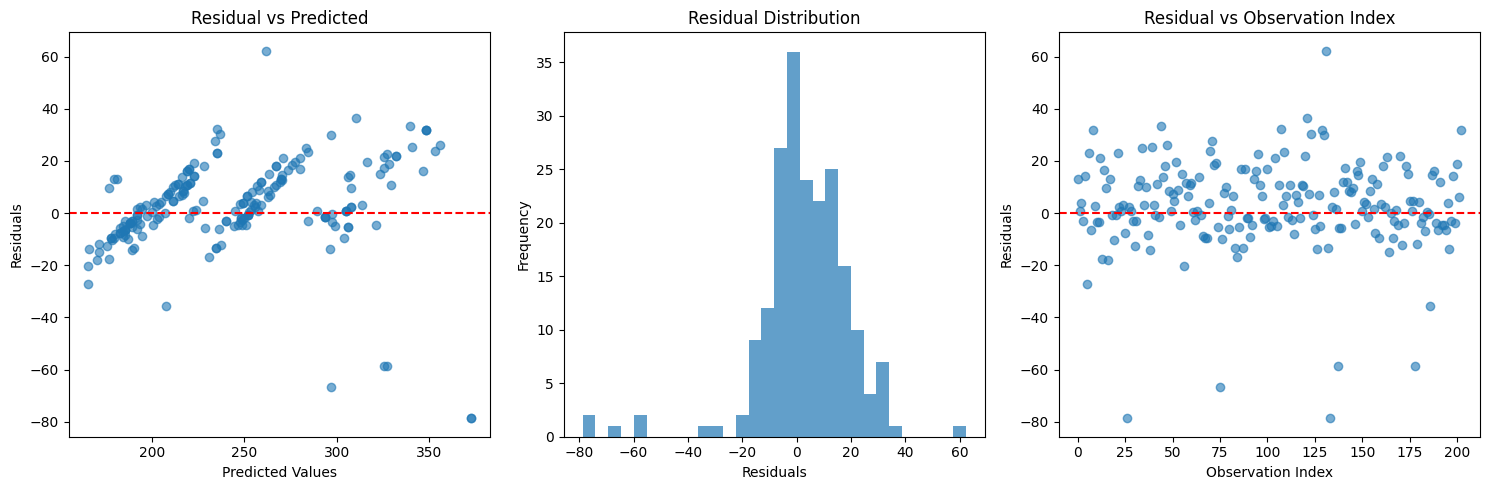

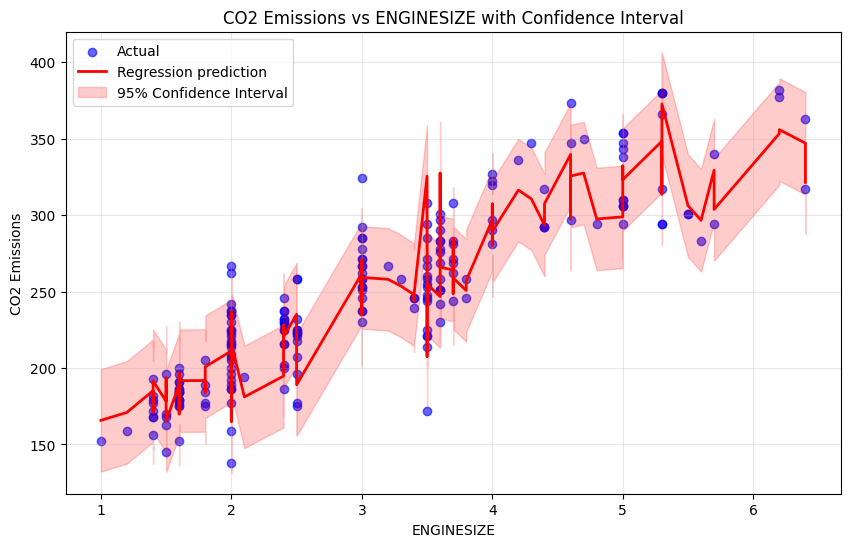

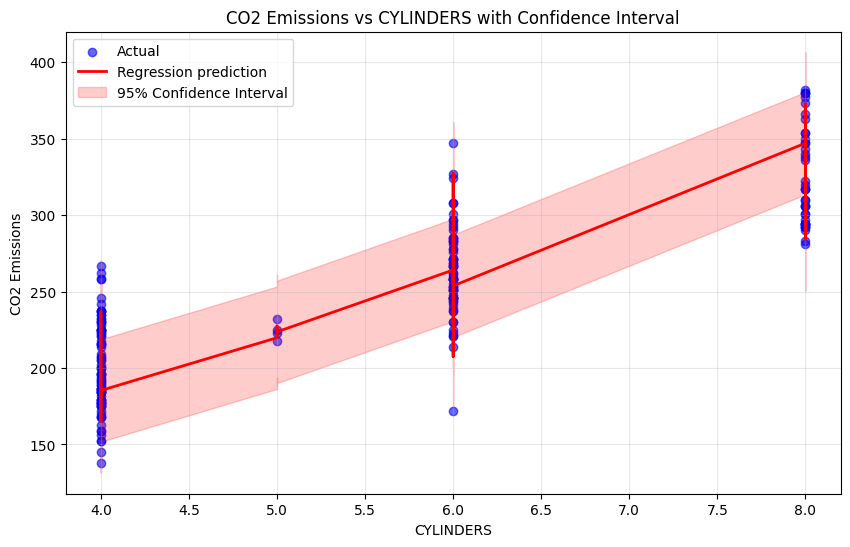

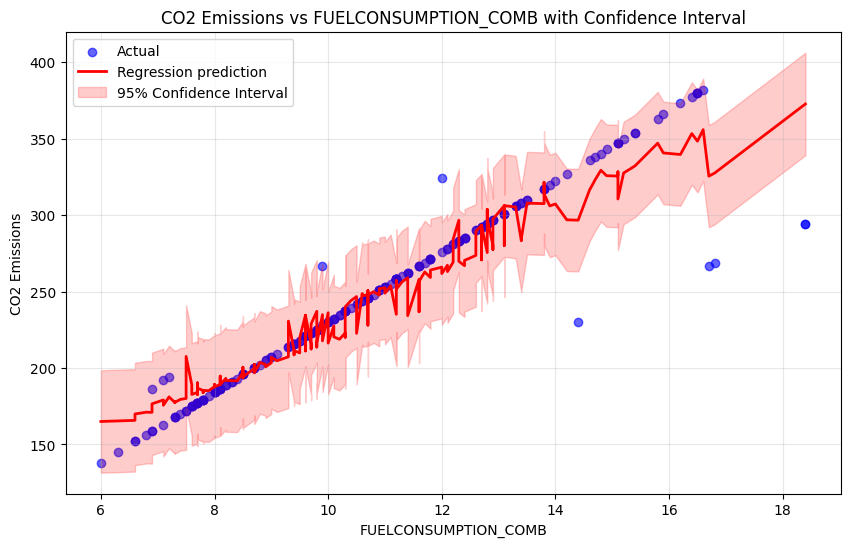


=== MODEL PERFORMANCE ===
R² Score: 0.9042
RMSE: 17.36

=== REGRESSION EQUATION ===
CO2_EMISSIONS = 131.13 + 36.70 * ENGINESIZE

=== FEATURE IMPORTANCE ===
                Feature  Coefficient  Absolute_Impact
2  FUELCONSUMPTION_COMB    12.810597        12.810597
0            ENGINESIZE     6.953895         6.953895
1             CYLINDERS     6.461667         6.461667

=== PREDICTION EXAMPLES ===

Example 1:
  ENGINESIZE: 2.1
  CYLINDERS: 4.0
  FUELCONSUMPTION_COMB: 7.2
  Actual CO2: 194.0 g/km
  Predicted CO2: 181.1 g/km
  Error: 12.9 g/km

Example 2:
  ENGINESIZE: 5.0
  CYLINDERS: 8.0
  FUELCONSUMPTION_COMB: 13.3
  Actual CO2: 306.0 g/km
  Predicted CO2: 305.3 g/km
  Error: 0.7 g/km

Example 3:
  ENGINESIZE: 3.5
  CYLINDERS: 6.0
  FUELCONSUMPTION_COMB: 11.3
  Actual CO2: 260.0 g/km
  Predicted CO2: 256.3 g/km
  Error: 3.7 g/km

=== FEATURE CORRELATION MATRIX ===


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


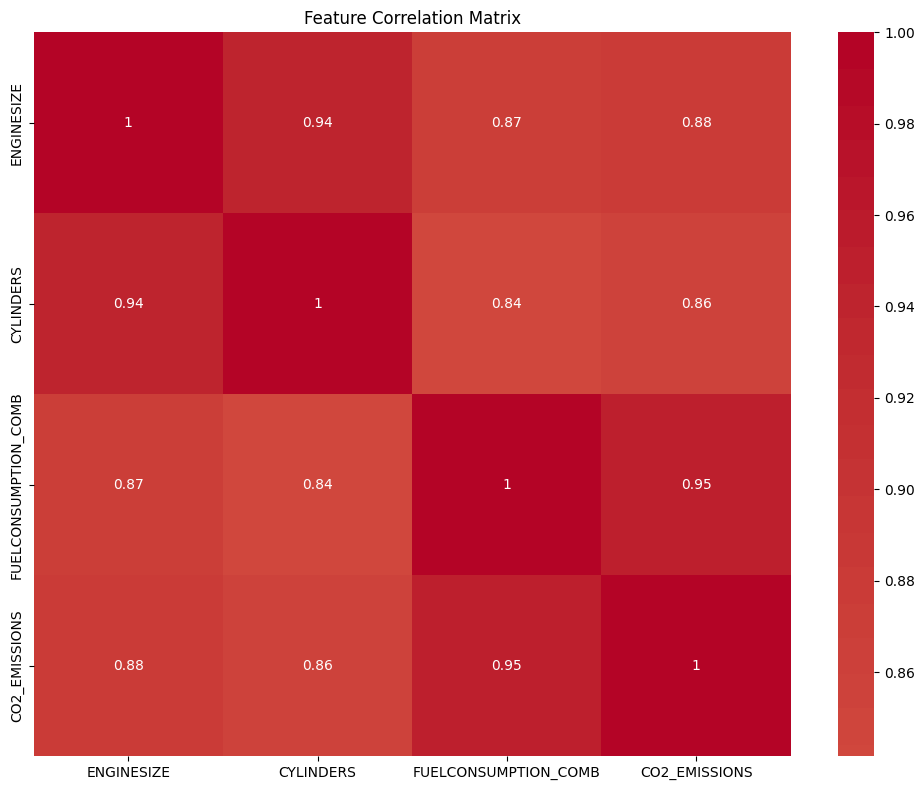

CO2_EMISSIONS           1.000000
FUELCONSUMPTION_COMB    0.947618
ENGINESIZE              0.882783
CYLINDERS               0.858103
Name: CO2_EMISSIONS, dtype: float64


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate predictions and residuals
y_pred = model_01.predict(X_test)
residuals = y_test - y_pred_01

# 1. Residual Analysis
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_pred_01, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Predicted')

plt.subplot(132)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.subplot(133)
plt.scatter(range(len(residuals)), residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Residual vs Observation Index')

plt.tight_layout()
plt.show()

# 2. Confidence Interval for Predictions - FIXED
def plot_with_confidence(X_test, y_test, y_pred_01, residuals, feature_index=0):
    """Plot regression relationship for one feature with confidence interval"""
    std_residual = np.std(residuals)
    confidence = 1.96 * std_residual  # 95% confidence
    
    # Convert to DataFrame if it's not already
    if not isinstance(X_test, pd.DataFrame):
        X_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
    
    # Sort by the selected feature for better visualization
    sorted_indices = np.argsort(X_test.iloc[:, feature_index])
    sorted_feature = X_test.iloc[sorted_indices, feature_index]
    sorted_y_test = y_test.iloc[sorted_indices] if hasattr(y_test, 'iloc') else y_test[sorted_indices]
    sorted_y_pred = y_pred_01[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_feature, sorted_y_test, alpha=0.6, label='Actual', color='blue')
    plt.plot(sorted_feature, sorted_y_pred, color='red', linewidth=2, label='Regression prediction')
    
    # Confidence interval
    plt.fill_between(sorted_feature.values, 
                    sorted_y_pred - confidence, 
                    sorted_y_pred + confidence, 
                    color='red', alpha=0.2, label='95% Confidence Interval')
    
    feature_name = X_test.columns[feature_index]
    plt.xlabel(feature_name)
    plt.ylabel('CO2 Emissions')
    plt.title(f'CO2 Emissions vs {feature_name} with Confidence Interval')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot for each feature
for i in range(X_test.shape[1]):
    plot_with_confidence(X_test, y_test, y_pred_01, residuals, feature_index=i)

# 3. Model Performance Metrics
print("\n=== MODEL PERFORMANCE ===")
r2 = r2_score(y_test, y_pred_01)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# 4. Model Equation - FIXED
print(f"\n=== REGRESSION EQUATION ===")
equation = f"CO2_EMISSIONS = {model.intercept_:.2f}"
for i, coef in enumerate(model.coef_):
    feature_name = X_test.columns[i] if hasattr(X_test, 'columns') else f'feature_{i}'
    equation += f" + {coef:.2f} * {feature_name}"
print(equation)

# 5. Feature Importance - FIXED
print(f"\n=== FEATURE IMPORTANCE ===")
# Get feature names safely
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    feature_names = [f'feature_{i}' for i in range(len(model_01.coef_))]

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_01.coef_,
    'Absolute_Impact': np.abs(model_01.coef_)
}).sort_values('Absolute_Impact', ascending=False)

print(feature_importance)

# 6. Prediction Examples - FIXED
print(f"\n=== PREDICTION EXAMPLES ===")
# Create some example data points
n_examples = min(3, len(X_test))
for i in range(n_examples):
    if hasattr(X_test, 'iloc'):
        features = X_test.iloc[i]
    else:
        features = X_test[i]
    
    actual = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
    predicted = y_pred_01[i]
    
    print(f"\nExample {i+1}:")
    if hasattr(features, 'items'):
        for feature, value in features.items():
            print(f"  {feature}: {value:.1f}")
    else:
        for j, value in enumerate(features):
            feature_name = feature_names[j] if j < len(feature_names) else f'feature_{j}'
            print(f"  {feature_name}: {value:.1f}")
    
    print(f"  Actual CO2: {actual:.1f} g/km")
    print(f"  Predicted CO2: {predicted:.1f} g/km")
    print(f"  Error: {abs(actual - predicted):.1f} g/km")

# 7. Correlation Heatmap (useful for multiple regression)
print(f"\n=== FEATURE CORRELATION MATRIX ===")
if hasattr(X_test, 'join'):
    # If X_test is DataFrame and y_test is Series
    correlation_matrix = X_test.join(y_test.rename('CO2_EMISSIONS')).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    print(correlation_matrix['CO2_EMISSIONS'].sort_values(ascending=False))